# Exploración de Bimbo datasets

## Se usará la base de datos montada en Postgresql. 

Tablas:
1.Cliente
2.Producto
3.Rutas
4.Train
5.Test


In [24]:
#cargar dependencias
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#cargar sql a dataframe
# Parametros de conexion
db_connection = psycopg2.connect(host="192.168.99.100", port="32770",
                                 user="postgres",password="",
                                 dbname="bimbo")

# conectar a db.cursor
db_cursor = db_connection.cursor()

In [5]:
# sql query juntando tablas de producto, cliente y train donde el cliente es tiendas OXXO en todo el país
sql_query = "select * from bimbo_dataset.producto a, bimbo_dataset.train b, bimbo_dataset.cliente c, bimbo_dataset.town_state d where a.producto_id = b.producto_id and b.cliente_id = c.cliente_id and b.agencia_id = d.agencia_id and (c.nombre_cliente like '%XX%' or c.nombre_cliente like '%xx%')"


In [6]:
sql_query

"select * from bimbo_dataset.producto a, bimbo_dataset.train b, bimbo_dataset.cliente c, bimbo_dataset.town_state d where a.producto_id = b.producto_id and b.cliente_id = c.cliente_id and b.agencia_id = d.agencia_id and (c.nombre_cliente like '%XX%' or c.nombre_cliente like '%xx%')"

In [38]:
#Crear data_frame con pandas
#df_oxxo = pd.read_sql_query(sql_query, db_connection)
#df_oxxo
#Leyendo un csv sacado de la base de datos...mas rapido?
#Fue obtenido con pgadmin3 postgresql, corriendo un sql que sale a un csv
df_oxxo = pd.read_csv("/Users/H/OneDrive/Python_data_science/Reto_bimbo/data/mydataset.csv")


In [51]:
df_oxxo['semana'].value_counts()

4    312570
3    311517
9    306134
5    304812
6    299937
8    299503
7    298727
Name: semana, dtype: int64

In [41]:
#Transformar a un nombre corto y hacer parsing de los kg y g por producto
df_oxxo
df_oxxo['nombre_corto'] = df_oxxo.nombre_prod.str.extract('^(\D*)', expand=False)
df_oxxo['marca'] = df_oxxo.nombre_prod.str.extract('^.+\s(\D+) \d+$', expand=False)
d = df_oxxo.nombre_prod.str.extract('(\d+)(Kg|g)', expand=True)
df_oxxo['peso'] = d[0].astype('float')*d[1].map({'Kg':1000, 'g':1})
df_oxxo['piezas'] =  df_oxxo.nombre_prod.str.extract('(\d+)p ', expand=False).astype('float')
df_oxxo.head()

,producto_id,nombre_prod,semana,agencia_id,canal_id,ruta_sak,cliente_id,producto_id.1,venta_uni_hoy,venta_hoy,...,demanda_uni_equil,cliente_id.1,nombre_cliente,agencia_id.1,town,state,nombre_corto,marca,peso,piezas
0,49782,Tortillinas 12p 310g NW MTA TR 49782,9,1585,4,6605,165288,49782,5,58.00,...,5,165288,OXXO VILLAS DEL REY II,1585,2563 MEXICALI PONIENTE,BAJA CALIFORNIA NORTE,Tortillinas,TR,310.0,12.0
1,47957,Tortilla Hna 750g 18p RW Sonora MTA DH 47957,9,1585,4,6605,165288,47957,23,425.27,...,23,165288,OXXO VILLAS DEL REY II,1585,2563 MEXICALI PONIENTE,BAJA CALIFORNIA NORTE,Tortilla Hna,DH,750.0,18.0
2,44829,Totopos 280g MTA DH 44829,9,1585,4,6605,165288,44829,4,56.04,...,4,165288,OXXO VILLAS DEL REY II,1585,2563 MEXICALI PONIENTE,BAJA CALIFORNIA NORTE,Totopos,DH,280.0,NaN
3,44371,Mantecadas 2p 105g MTB TR 44371,9,1585,4,6605,165288,44371,30,243.90,...,30,165288,OXXO VILLAS DEL REY II,1585,2563 MEXICALI PONIENTE,BAJA CALIFORNIA NORTE,Mantecadas,TR,105.0,2.0
4,43338,Pan Blanco 680g MTA BIM 43338,9,1585,4,6605,165288,43338,24,525.12,...,24,165288,OXXO VILLAS DEL REY II,1585,2563 MEXICALI PONIENTE,BAJA CALIFORNIA NORTE,Pan Blanco,BIM,680.0,NaN


/Users/H/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


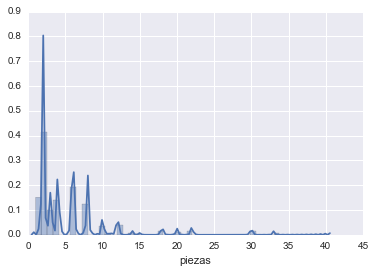

In [42]:
sns.distplot(df_oxxo.piezas.dropna())

In [43]:
df_oxxo.columns

Index(['producto_id', 'nombre_prod', 'semana', 'agencia_id', 'canal_id',
       'ruta_sak', 'cliente_id', 'producto_id.1', 'venta_uni_hoy', 'venta_hoy',
       'dev_uni_prox', 'dev_prox', 'demanda_uni_equil', 'cliente_id.1',
       'nombre_cliente', 'agencia_id.1', 'town', 'state', 'nombre_corto',
       'marca', 'peso', 'piezas'],
      dtype='object')

In [83]:
#Seleccionar las variables con las cuales vas a trabajar: producto_id, nombre del producto, estado, y las demandas
#para hacer histogramas
ts_prod_corto = pd.DataFrame(df_oxxo[['semana','state','producto_id','nombre_prod','venta_uni_hoy','venta_hoy','dev_uni_prox',
                         'dev_prox','demanda_uni_equil']])
ts_prod_corto

,semana,state,producto_id,nombre_prod,venta_uni_hoy,venta_hoy,dev_uni_prox,dev_prox,demanda_uni_equil
0,9,BAJA CALIFORNIA NORTE,49782,Tortillinas 12p 310g NW MTA TR 49782,5,58.00,0,0.00,5
1,9,BAJA CALIFORNIA NORTE,47957,Tortilla Hna 750g 18p RW Sonora MTA DH 47957,23,425.27,0,0.00,23
2,9,BAJA CALIFORNIA NORTE,44829,Totopos 280g MTA DH 44829,4,56.04,0,0.00,4
3,9,BAJA CALIFORNIA NORTE,44371,Mantecadas 2p 105g MTB TR 44371,30,243.90,0,0.00,30
4,9,BAJA CALIFORNIA NORTE,43338,Pan Blanco 680g MTA BIM 43338,24,525.12,0,0.00,24
5,9,BAJA CALIFORNIA NORTE,43251,Conchas Vainilla 2p 120g MTB BIM 43251,3,38.13,0,0.00,3
6,9,BAJA CALIFORNIA NORTE,43246,Pan Multigrano 540g MTA BIM 43246,8,186.00,0,0.00,8
7,9,BAJA CALIFORNIA NORTE,43223,Pan Blanco 460g MTA BIM 43223,17,320.62,0,0.00,17
8,9,BAJA CALIFORNIA NORTE,43220,Roles Glass 6p 410g MTB BIM 43220,22,447.92,0,0.00,22
9,9,BAJA CALIFORNIA NORTE,43209,Bimbunuelos 4p 66g MTA BIM 43209,5,37.60,0,0.00,5


In [45]:
ts_prod_corto.columns

Index(['semana', 'state', 'producto_id', 'nombre_prod', 'venta_uni_hoy',
       'venta_hoy', 'dev_uni_prox', 'dev_prox', 'demanda_uni_equil'],
      dtype='object')

In [115]:
aggsum = ts_prod_corto.groupby(['semana', 'producto_id'], as_index=False).agg(['count','sum', 'min', 'max','median','mean'])
aggsum.head()

venta_uni_hoy                                      \
                           count   sum  min   max median        mean   
semana producto_id                                                     
3      53                      6  2924  116  1289  417.5  487.333333   
       72                     11    51    1    10    4.0    4.636364   
       73                     14    55    1    15    2.0    3.928571   
       145                     5    47    3    19    8.0    9.400000   
       163                     1     1    1     1    1.0    1.000000   

                   venta_hoy                                  ...      \
                       count       sum      min       max     ...       
semana producto_id                                            ...       
3      53                  6  41813.20  1658.80  18432.70     ...       
       72                 11    188.70     3.70     37.00     ...       
       73                 14   1189.55    21.32    336.75     ...       
       145                 5    963.50    61.50    389.50     ...       
       163                 1    135.00   135.00    135.00     ...       

                   dev_prox                         demanda_uni_equil        \
                        min    max median      mean             count   sum   
semana producto_id                                                            
3      53               0.0   0.00    0.0  0.000000                 6  2924   
       72               0.0   0.00    0.0  0.000000                11    51   
       73               0.0  21.32    0.0  1.522857                14    54   
       145              0.0   0.00    0.0  0.000000                 5    47   
       163              0.0   0.00    0.0  0.000000                 1     1   

                                                  
                    min   max median        mean  
semana producto_id                                
3      53           116  1289  417.5  487.333333  
       72             1    10    4.0    4.636364  
       73             0    15    2.0    3.857143  
       145            3    19    8.0    9.400000  
       163            1     1    1.0    1.000000  

[5 rows x 30 columns]

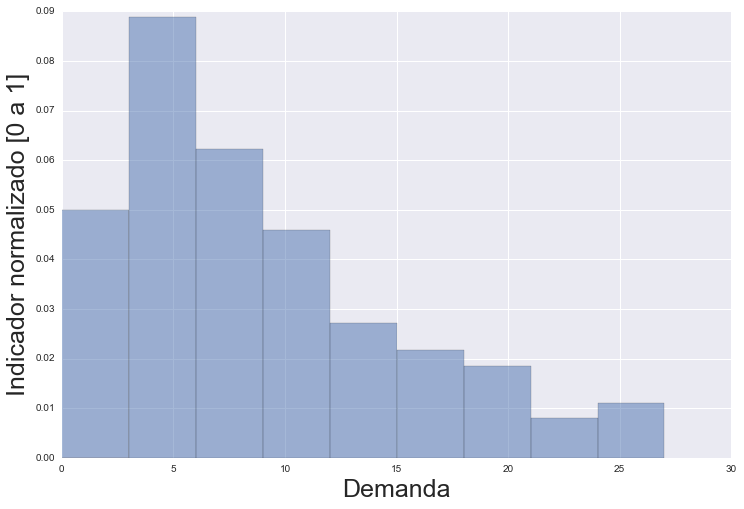

In [81]:
#Sacar histogramas de la seleccion de las variables
hist_range = range(0,30,3)
ts_prod_corto['demanda_uni_equil'].hist(bins = hist_range, alpha = 0.5, figsize=(12,8), normed=True)
plt.xlabel('Demanda Total', fontsize = 25)
plt.ylabel('Indicador normalizado [0 a 1]', fontsize = 25)


In [113]:

demanda_agg = (pd.merge(ts_prod_corto, aggsum, on='producto_id', how='left').
      groupby('nombre_corto')['Demanda_uni_equil'].sum().sort_values(ascending=False))

/Users/H/anaconda/lib/python3.5/site-packages/pandas/tools/merge.py:205: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


KeyError: 'producto_id'

In [111]:
#Feature selection
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=True,stop_words='tortilla')
X = vectorizer.fit_transform(ts_prod_corto)

ValueError: not a built-in stop list: tortilla